In [2]:
import sys
sys.path.insert(0, '../../')

In [3]:
import graph
import importlib
import math
import matplotlib
import matplotlib.pyplot as plt
import random
import topo
import typing
import utils
import yaml

matplotlib.rc('font', family='Times New Roman', size=16)

In [4]:
sc = topo.Scenario.from_dict(
    yaml.load(open("../../samples/1e3h.yaml", "r").read(), Loader=yaml.Loader)
)
source_selector = graph.SourceSelector({"rasp1": 8, "rasp2": 8, "rasp3": 8})
def unit_size_cb(r: int):
    # if r == 1:
    #     return 10000 * math.pow(10, random.randint(0, 1)) + 100000
    # return 10000 * math.pow(10, random.randint(0, 1)) / math.pow(2, (r-1) / 2)
    return 10000 * math.pow(10, random.randint(0, 1))
gen_args_list = [
    {
        "total_rank": random.randint(7, 7),
        "max_node_per_rank": random.randint(2, 2),
        "max_predecessors": random.randint(2, 2),
        "mi_cb": lambda: 1,
        "memory_cb": lambda: int(2e8),
        "unit_size_cb": unit_size_cb,
        "unit_rate_cb": lambda: random.randint(10, 20),
        "source_hosts": source_selector,
        "sink_hosts": ["cloud1"],
    }
    for _ in range(12)
]
graph_list = [
    graph.GraphGenerator("g" + str(idx), **gen_args).gen_dag_graph()
    for idx, gen_args in enumerate(gen_args_list)
]

In [5]:
import flow_cut
importlib.reload(flow_cut)

graph_cut_results = flow_cut.flow_cut(sc, graph_list)

In [6]:
for gc in graph_cut_results:
    print(gc[0], gc[1])

{'g0-v0'} {'g0-v8', 'g0-v1', 'g0-v9', 'g0-v5', 'g0-v4', 'g0-v2', 'g0-v6', 'g0-v3', 'g0-v7'}
{'g1-v4', 'g1-v0', 'g1-v6', 'g1-v2'} {'g1-v10', 'g1-v7', 'g1-v8', 'g1-v11', 'g1-v3', 'g1-v5', 'g1-v9', 'g1-v1'}
{'g2-v0'} {'g2-v7', 'g2-v6', 'g2-v9', 'g2-v1', 'g2-v3', 'g2-v5', 'g2-v10', 'g2-v2', 'g2-v8', 'g2-v4'}
{'g3-v0', 'g3-v3'} {'g3-v1', 'g3-v6', 'g3-v2', 'g3-v7', 'g3-v5', 'g3-v4'}
{'g4-v2', 'g4-v3', 'g4-v0'} {'g4-v5', 'g4-v6', 'g4-v7', 'g4-v8', 'g4-v1', 'g4-v4'}
{'g5-v2', 'g5-v0'} {'g5-v1', 'g5-v4', 'g5-v3', 'g5-v5', 'g5-v8', 'g5-v6', 'g5-v7'}
{'g6-v0'} {'g6-v5', 'g6-v11', 'g6-v10', 'g6-v4', 'g6-v3', 'g6-v8', 'g6-v9', 'g6-v1', 'g6-v7', 'g6-v2', 'g6-v6'}
{'g7-v2', 'g7-v0'} {'g7-v1', 'g7-v9', 'g7-v5', 'g7-v6', 'g7-v3', 'g7-v8', 'g7-v7', 'g7-v4'}
{'g8-v0'} {'g8-v3', 'g8-v5', 'g8-v7', 'g8-v1', 'g8-v6', 'g8-v8', 'g8-v4', 'g8-v2'}
{'g9-v3', 'g9-v0'} {'g9-v7', 'g9-v4', 'g9-v8', 'g9-v5', 'g9-v2', 'g9-v6', 'g9-v1'}
{'g10-v1', 'g10-v3', 'g10-v2', 'g10-v0'} {'g10-v4', 'g10-v9', 'g10-v5', 'g10-v8', 'g

In [7]:
import bd_calc
importlib.reload(bd_calc)

flow_bd = sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, graph_cut_results))
print(flow_bd)
print(sum([len(gc[0]) for gc in graph_cut_results]))

20230000.0
24


In [8]:
import all_cloud_cut
importlib.reload(all_cloud_cut)

all_cloud_bd = sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, all_cloud_cut.all_cloud_cut(sc, graph_list)))
print(all_cloud_bd)

31610000.0


In [9]:
import greedy_cut
importlib.reload(greedy_cut)

greedy_bd = sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, greedy_cut.greedy_cut(sc, graph_list)))
print(greedy_bd)
print(sum([len(gc[0]) for gc in greedy_cut.greedy_cut(sc, graph_list)]))
for gc in greedy_cut.greedy_cut(sc, graph_list):
    print(gc[0], gc[1])

29260000.0
24
{'g0-v0'} {'g0-v8', 'g0-v1', 'g0-v9', 'g0-v5', 'g0-v4', 'g0-v2', 'g0-v6', 'g0-v3', 'g0-v7'}
{'g1-v3', 'g1-v0'} {'g1-v10', 'g1-v4', 'g1-v6', 'g1-v7', 'g1-v8', 'g1-v11', 'g1-v5', 'g1-v9', 'g1-v1', 'g1-v2'}
{'g2-v0'} {'g2-v7', 'g2-v6', 'g2-v9', 'g2-v1', 'g2-v3', 'g2-v5', 'g2-v10', 'g2-v2', 'g2-v8', 'g2-v4'}
{'g3-v0'} {'g3-v1', 'g3-v6', 'g3-v2', 'g3-v7', 'g3-v5', 'g3-v4', 'g3-v3'}
{'g4-v2', 'g4-v0'} {'g4-v5', 'g4-v6', 'g4-v7', 'g4-v8', 'g4-v3', 'g4-v1', 'g4-v4'}
{'g5-v0'} {'g5-v1', 'g5-v4', 'g5-v3', 'g5-v5', 'g5-v2', 'g5-v8', 'g5-v6', 'g5-v7'}
{'g6-v0'} {'g6-v5', 'g6-v11', 'g6-v10', 'g6-v4', 'g6-v3', 'g6-v8', 'g6-v9', 'g6-v1', 'g6-v7', 'g6-v2', 'g6-v6'}
{'g7-v1', 'g7-v3', 'g7-v0'} {'g7-v2', 'g7-v9', 'g7-v5', 'g7-v6', 'g7-v8', 'g7-v7', 'g7-v4'}
{'g8-v3', 'g8-v7', 'g8-v1', 'g8-v4', 'g8-v2', 'g8-v0'} {'g8-v5', 'g8-v6', 'g8-v8'}
{'g9-v3', 'g9-v0'} {'g9-v7', 'g9-v4', 'g9-v8', 'g9-v5', 'g9-v2', 'g9-v6', 'g9-v1'}
{'g10-v0', 'g10-v2', 'g10-v1'} {'g10-v4', 'g10-v3', 'g10-v5', 'g10-v8'

In [10]:
greedy_results = greedy_cut.greedy_cut(sc, graph_list)
flow_results = graph_cut_results
for g, gr, fr in zip(graph_list, greedy_results, flow_results):
    print(bd_calc.bd_calc(g, gr[0], gr[1]), bd_calc.bd_calc(g, fr[0], fr[1]))

690000.0 690000.0
7300000.0 3970000.0
2270000.0 2270000.0
1440000.0 570000.0
1370000.0 330000.0
2430000.0 1440000.0
3120000.0 3120000.0
4340000.0 1940000.0
1490000.0 2000000.0
680000.0 680000.0
1220000.0 310000.0
2910000.0 2910000.0


In [11]:
for u, v, data in graph_list[0].get_edges():
    print('{} -->|{}| {}'.format(u, int(data['unit_size'] * data['per_second'] / 1000), v))

g0-v0 -->|140| g0-v1
g0-v0 -->|150| g0-v2
g0-v0 -->|200| g0-v3
g0-v0 -->|200| g0-v4
g0-v1 -->|100| g0-v4
g0-v2 -->|180| g0-v5
g0-v4 -->|2000| g0-v6
g0-v5 -->|1100| g0-v6
g0-v5 -->|1500| g0-v7
g0-v5 -->|1500| g0-v8
g0-v6 -->|190| g0-v8
g0-v6 -->|1800| g0-v9
g0-v7 -->|130| g0-v9


In [12]:
def cut_bd_compare(sc: topo.Scenario, graph_list: typing.List[graph.ExecutionGraph]):
    return (
        sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, all_cloud_cut.all_cloud_cut(sc, graph_list))),
        sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, flow_cut.flow_cut(sc, graph_list))),
        sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, greedy_cut.greedy_cut(sc, graph_list))),
        sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, greedy_cut.greedy_cut2(sc, graph_list))),
    )

In [13]:
from tqdm.notebook import trange

def run_small_sc(ax, topo_file, labels, source_selector_dict):
    sc = topo.Scenario.from_dict(
        yaml.load(open(topo_file, "r").read(), Loader=yaml.Loader)
    )
    # labels = [4, 8, 12, 16, 20]
    test_round = 100
    flow_box_data = [[] for _ in labels]
    greedy_box_data = [[] for _ in labels]
    greedy2_box_data = [[] for _ in labels]
    base_data = [[] for _ in labels]
    flow_data = [[] for _ in labels]
    greedy_data = [[] for _ in labels]
    greedy2_data = [[] for _ in labels]
    for idx, graph_count in enumerate(labels):
        for _ in trange(test_round, desc="running with {} graphs".format(graph_count)):
            source_selector = graph.SourceSelector(source_selector_dict)
            gen_args_list = [
                    {
                    "total_rank": random.randint(3, 7),
                    "max_node_per_rank": random.randint(1, 3),
                    "max_predecessors": random.randint(1, 2),
                    "mi_cb": lambda: 1,
                    "memory_cb": lambda: int(2e8),
                    "unit_size_cb": unit_size_cb,
                    "unit_rate_cb": lambda: random.randint(10, 20),
                    "source_hosts": source_selector,
                    "sink_hosts": ["cloud1"],
                }
                for _ in range(graph_count)
            ]
            graph_list = [
                graph.GraphGenerator("g" + str(idx), **gen_args).gen_dag_graph()
                for idx, gen_args in enumerate(gen_args_list)
            ]
            base, flow, greedy, greedy2 = cut_bd_compare(sc, graph_list)
            base_data[idx].append(base)
            flow_data[idx].append(flow)
            greedy_data[idx].append(greedy)
            greedy2_data[idx].append(greedy2)
            flow_box_data[idx].append(flow / base)
            if flow / base > 1:
                print(flow, base)
            greedy_box_data[idx].append(greedy / base)
            greedy2_box_data[idx].append(greedy2 / base)
    print([utils.avg(*i) / 1e6 for i in base_data])
    print([utils.avg(*i) / 1e6 for i in flow_data])
    print([utils.avg(*i) / 1e6 for i in greedy_data])
    print([utils.avg(*i) / 1e6 for i in greedy2_data])
    # flow_box_data = [i / test_round for i in flow_box_data]
    width = 0.3
    # flow_plot = plt.boxplot(flow_box_data, vert=True, notch=True, positions=[i-width/2 for i in range(1, 6)], widths=width, patch_artist=True)
    flow_plot = ax.violinplot(flow_box_data, vert=True, positions=[i-width for i in range(1, len(labels)+1)], widths=width)
    # for b in flow_plot['boxes']:
    #     b.set_facecolor('lightsalmon')
    # greedy_plot = plt.boxplot(greedy_box_data, vert=True, notch=True, positions=[i+width/2 for i in range(1, 6)], widths=width, patch_artist=True)
    greedy_plot = ax.violinplot(greedy_box_data, vert=True, positions=[i+width for i in range(1, len(labels)+1)], widths=width)
    # for b in greedy_plot['boxes']:
    #     b.set_facecolor('lightblue')
    ax.violinplot(greedy2_box_data, vert=True, positions=[i for i in range(1, len(labels)+1)], widths=width)

running with 4 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 8 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 12 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 16 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 20 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[8.8764, 17.8637, 26.0627, 34.282, 43.6947]
[6.0977, 12.2941, 18.5692, 26.0677, 37.9701]
[10.8164, 17.9846, 22.4696, 29.423, 40.9213]
[6.6868, 13.1579, 19.76, 26.395, 37.9155]


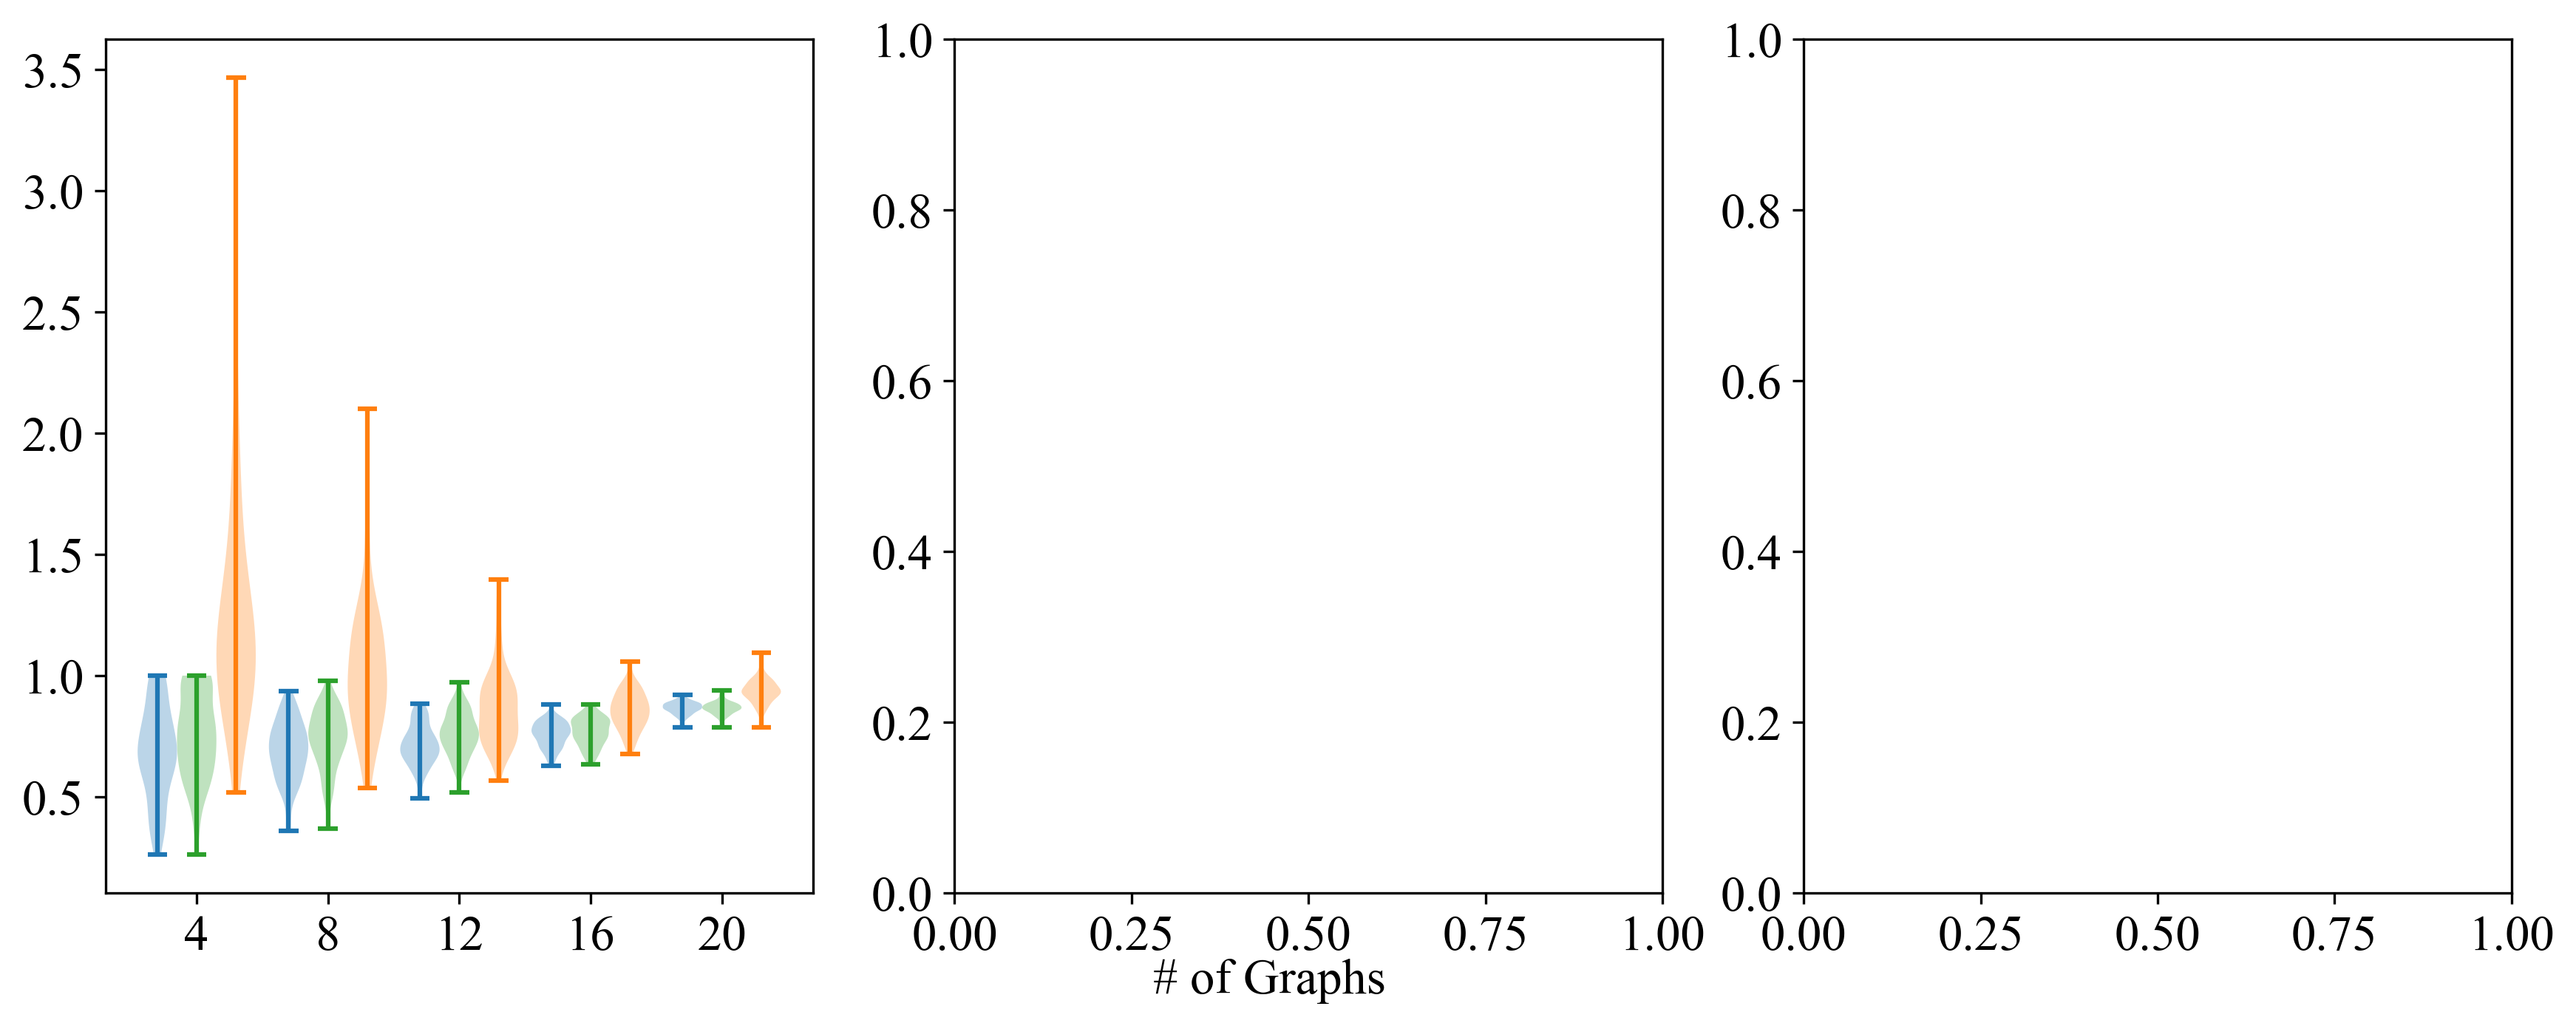

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5), dpi=300)
fig.supxlabel('# of Graphs', size='medium')
small_labels = [4, 8, 12, 16, 20]
axes[0].set_xticks([i+1 for i in range(len(small_labels))])
axes[0].set_xticklabels(small_labels)
source_dict = {'rasp1': 8, 'rasp2': 8, 'rasp3': 8}
run_small_sc(axes[0], "../../samples/1e3h.yaml", small_labels, source_dict)

In [15]:
medium_labels = [40, 60, 80, 100, 120]
axes[1].set_xticks([i+1 for i in range(len(medium_labels))])
axes[1].set_xticklabels(medium_labels)
source_dict = {'rasp'+str(i): 8 for i in range(1, 7)}
source_dict.update({'vm'+str(i): 16 for i in range(1, 7)})
run_small_sc(axes[1], "../../samples/1e12h.yaml", medium_labels, source_dict)

running with 40 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 60 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 80 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 100 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 120 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[87.5236, 132.1641, 178.4171, 221.087, 264.8617]
[60.2308, 90.7424, 124.7389, 169.3834, 228.4757]
[100.9481, 113.8839, 145.5227, 191.7513, 245.8305]
[64.7558, 97.2933, 132.1179, 170.5217, 227.976]


In [16]:
large_labels = [200, 300, 400, 500, 600]
axes[2].set_xticks([i+1 for i in range(len(large_labels))])
axes[2].set_xticklabels(large_labels)
source_dict = {'e0rasp'+str(i): 8 for i in range(1, 9)}
source_dict.update({'e1rasp'+str(i): 8 for i in range(1, 9)})
source_dict.update({'e0vm'+str(i): 16 for i in range(1, 9)})
source_dict.update({'e1vm'+str(i): 16 for i in range(1, 9)})
source_dict.update({'e0desktop'+str(i): 32 for i in range(1, 5)})
source_dict.update({'e1desktop'+str(i): 32 for i in range(1, 5)})
run_small_sc(axes[1], "../../samples/1e40h.yaml", large_labels, source_dict)
plt.show()

running with 200 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 300 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 400 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 500 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 600 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[439.2224, 656.4121, 880.7457, 1100.2087, 1321.7432]
[303.5014, 453.5327, 639.4946, 905.8523, 1251.3361]
[461.4134, 533.6021, 738.5417, 995.5707, 1287.399]
[326.4087, 487.4287, 660.6338, 902.8972, 1251.1255]


running with 4 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 8 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 12 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 16 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 20 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[9.1237, 16.9633, 26.2634, 35.0997, 43.3535]
[6.2708, 11.6339, 18.2445, 26.8429, 37.6744]
[10.8132, 17.2761, 21.7787, 30.5851, 40.3547]
[6.7964, 12.544, 19.3088, 27.1362, 37.5395]


running with 40 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 60 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 80 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 100 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 120 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[87.1757, 133.0003, 176.1918, 218.2446, 264.8582]
[60.3595, 92.3435, 123.7366, 166.1399, 228.8455]
[101.0293, 115.6478, 144.5766, 187.3983, 245.933]
[64.8338, 99.2621, 130.8987, 167.0042, 228.3507]


running with 200 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 300 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 400 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 500 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

running with 600 graphs:   0%|          | 0/100 [00:00<?, ?it/s]

[439.2701, 658.8459, 878.1306, 1097.9495, 1316.09]
[303.4708, 455.0363, 635.819, 904.495, 1245.3722]
[462.8138, 536.3338, 735.1493, 993.6917, 1280.9008]
[325.5742, 488.6252, 656.9415, 900.9659, 1245.1557]


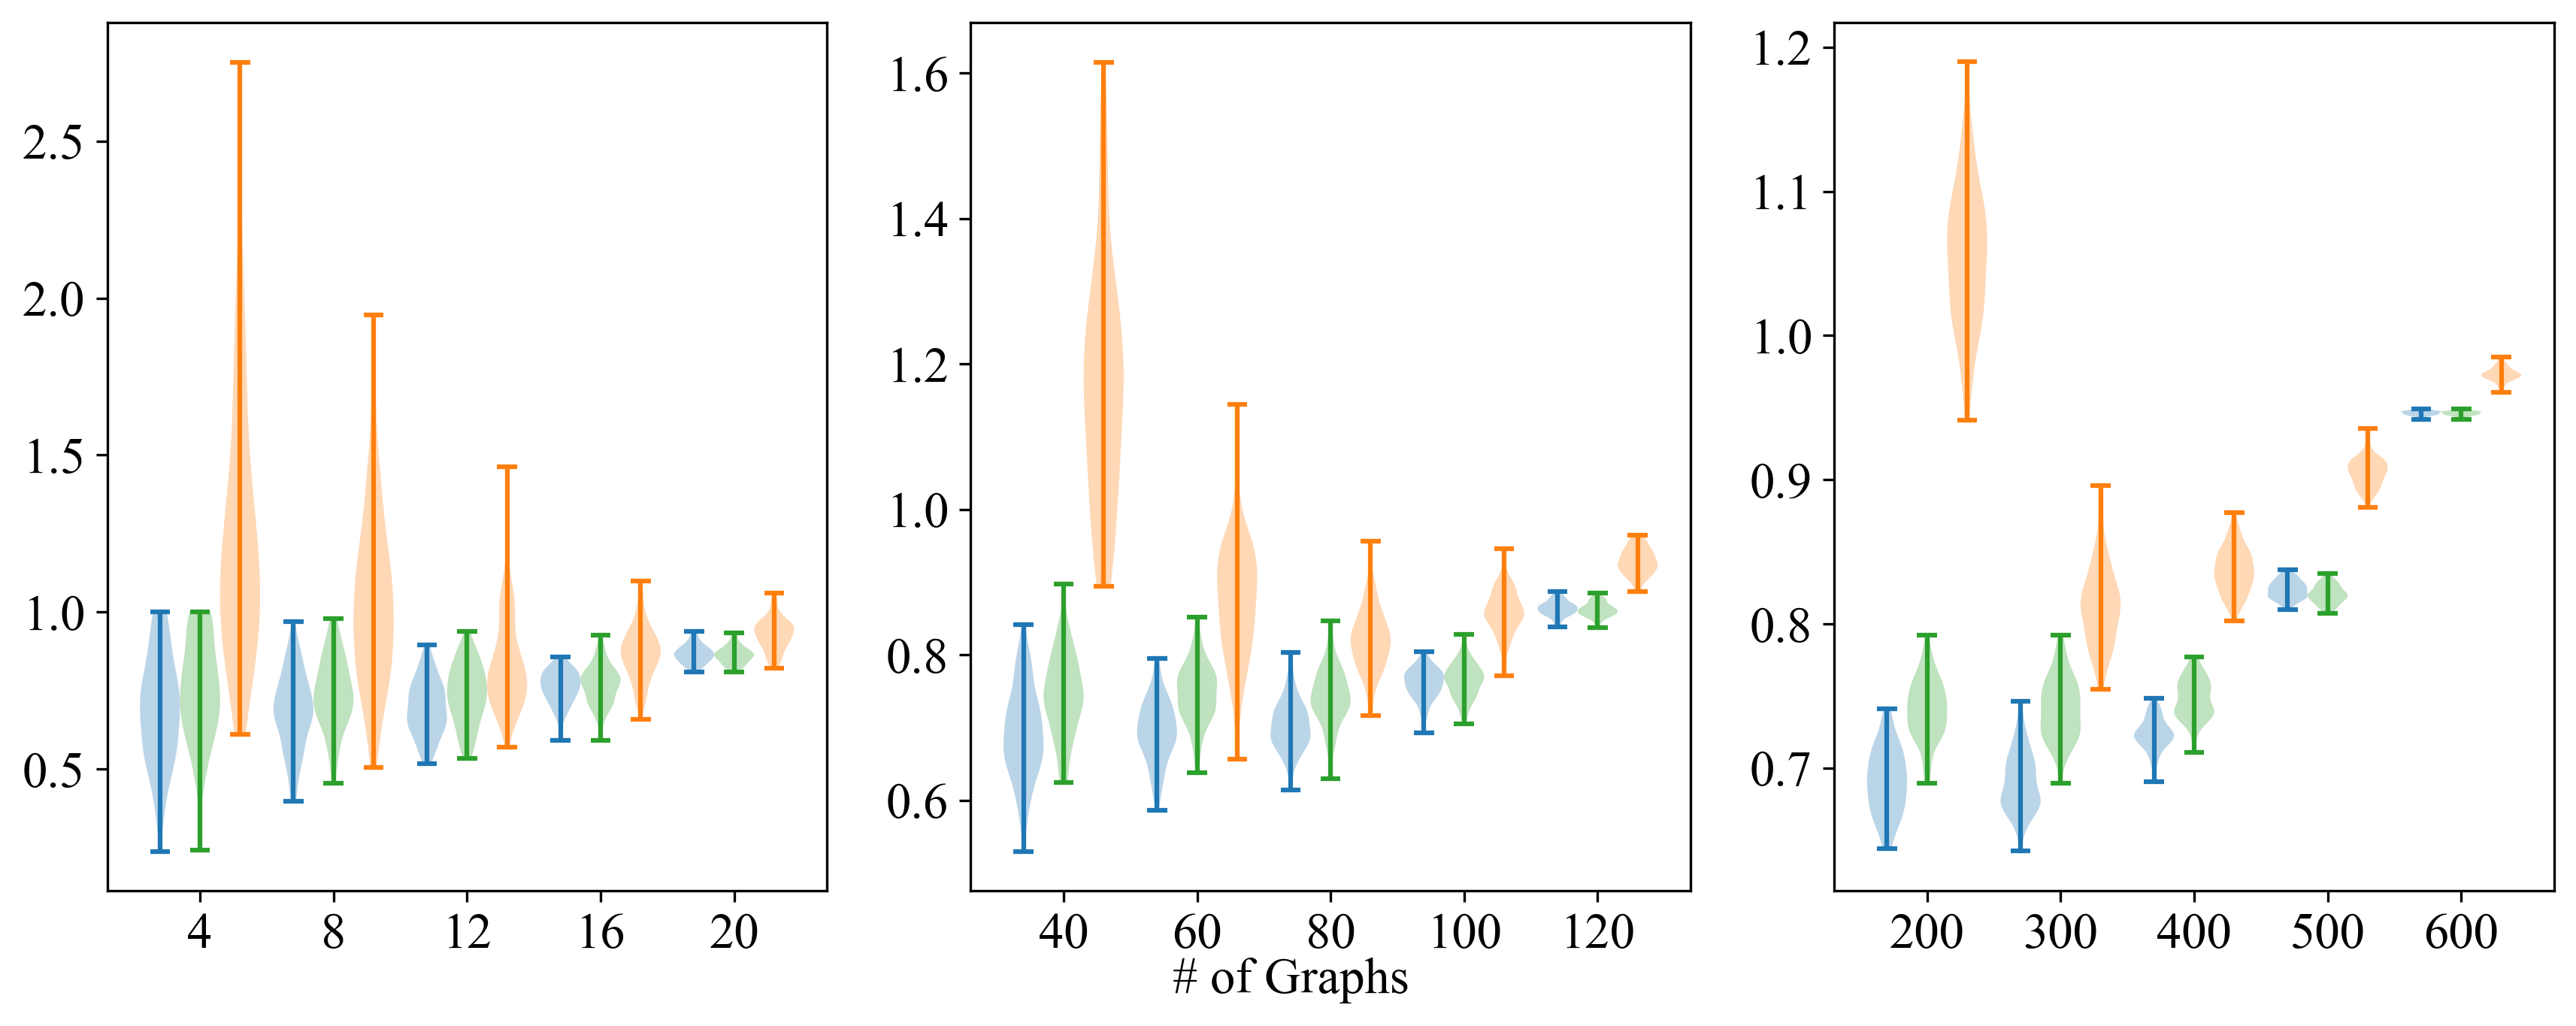

In [17]:

fig, axes = plt.subplots(1, 3, figsize=(14, 5), dpi=300)
fig.supxlabel('# of Graphs', size='medium')
small_labels = [4, 8, 12, 16, 20]
axes[0].set_xticks([i+1 for i in range(len(small_labels))])
axes[0].set_xticklabels(small_labels)
source_dict = {'rasp1': 8, 'rasp2': 8, 'rasp3': 8}
run_small_sc(axes[0], "../../samples/1e3h.yaml", small_labels, source_dict)

medium_labels = [40, 60, 80, 100, 120]
axes[1].set_xticks([i+1 for i in range(len(medium_labels))])
axes[1].set_xticklabels(medium_labels)
source_dict = {'rasp'+str(i): 8 for i in range(1, 7)}
source_dict.update({'vm'+str(i): 16 for i in range(1, 7)})
run_small_sc(axes[1], "../../samples/1e12h.yaml", medium_labels, source_dict)

large_labels = [200, 300, 400, 500, 600]
axes[2].set_xticks([i+1 for i in range(len(large_labels))])
axes[2].set_xticklabels(large_labels)
source_dict = {'e0rasp'+str(i): 8 for i in range(1, 9)}
source_dict.update({'e1rasp'+str(i): 8 for i in range(1, 9)})
source_dict.update({'e0vm'+str(i): 16 for i in range(1, 9)})
source_dict.update({'e1vm'+str(i): 16 for i in range(1, 9)})
source_dict.update({'e0desktop'+str(i): 32 for i in range(1, 5)})
source_dict.update({'e1desktop'+str(i): 32 for i in range(1, 5)})
run_small_sc(axes[2], "../../samples/1e40h.yaml", large_labels, source_dict)
plt.show()

In [36]:
# max_round = 1000
# while max_round > 0:
#     max_round -= 1
#     gen_args_list = [
#         {
#             "total_rank": random.randint(3, 7),
#             "max_node_per_rank": random.randint(1, 3),
#             "max_predecessors": random.randint(1, 2),
#             "mi_cb": lambda: 1,
#             "memory_cb": lambda: int(2e8),
#             "unit_size_cb": unit_size_cb,
#             "unit_rate_cb": lambda: random.randint(10, 20),
#             "source_hosts": source_selector,
#             "sink_hosts": ["cloud1"],
#         }
#         for _ in range(8)
#     ]
#     graph_list = [
#         graph.GraphGenerator("g" + str(idx), **gen_args).gen_dag_graph()
#         for idx, gen_args in enumerate(gen_args_list)
#     ]
#     base, flow, greedy, greedy2 = cut_bd_compare(sc, graph_list)
#     if flow > base:
#         print('error')
#         break


In [37]:
# importlib.reload(flow_cut)
# for s_cut, t_cut in all_cloud_cut.all_cloud_cut(sc, graph_list):
#     print(s_cut, t_cut)
# print(sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, all_cloud_cut.all_cloud_cut(sc, graph_list))))
# re = flow_cut.flow_cut(sc, graph_list)
# for s_cut, t_cut in re:
#     print(s_cut, t_cut)
# print(sum(bd_calc.bd_calc(g, gc[0], gc[1]) for g, gc in zip(graph_list, re)))